# Assignment # 1 - Machine Learning
## Introduction:
Logistic Regression is a Machine Learning classification algorithm that is used to predict the
probability of a categorical dependent variable. In logistic regression, the dependent variable is
a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other
words, the logistic regression model predicts P(Y=1) as a function of X.

## Assumptions:
• Binary logistic regression requires the dependent variable to be binary.<br>
• For a binary regression, the factor level 1 of the dependent variable should represent the
desired outcome.<br>
• Only the meaningful variables should be included.<br>
• The independent variables should be independent of each other. That is, the model
should have little or no multicollinearity.<br>
• The independent variables are linearly related to the log odds.<br>
• Logistic regression requires quite large sample sizes.<br>

## Data:
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing
campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict
whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be
downloaded from <a href="https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv">here</a>.

## Tasks:

### Task-1:
Read the dataset and print the following information for analysis.

In [106]:
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#1. Read the dataset
dataset = pd.read_csv("banking.csv")    #p(y=1) =  4640 and p(y=0) = 36548
print dataset.shape
print list(dataset.keys())

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [107]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [108]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Task-2: 
Plot the ‘y’ for counts to check the values of 0 and 1 in the prediction also plot the job, martial,
load and pooutcome.

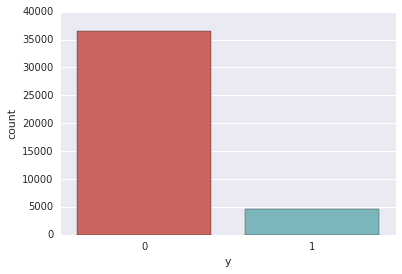

In [109]:
#2. Count plot the data
sns.countplot(x=dataset["y"],data=dataset, palette=sns.color_palette(["#D9544D","#72BFC4"]))
plt.show()

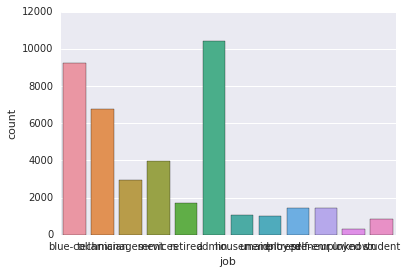

In [110]:
sns.countplot(x=dataset["job"],data=dataset)
plt.show()

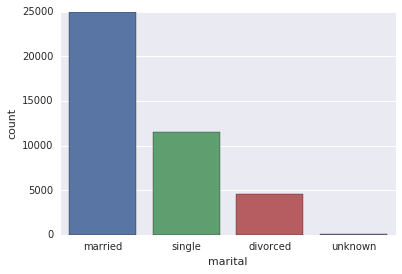

In [111]:
sns.countplot(x=dataset["marital"],data=dataset)
plt.show()

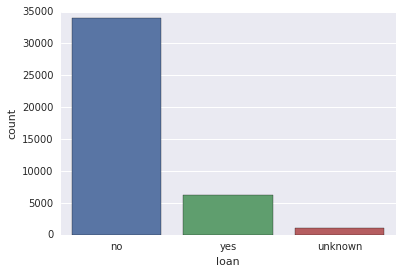

In [112]:
sns.countplot(x=dataset["loan"],data=dataset)
plt.show()

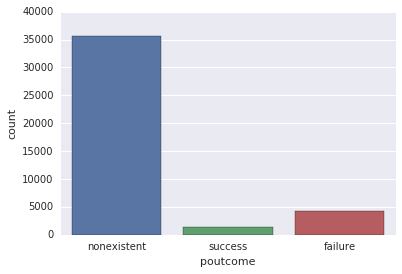

In [113]:
sns.countplot(x=dataset["poutcome"],data=dataset)
plt.show()

### Task-3:
Analyze the data using the y,job,martial and education for the insights.

In [114]:
#3. Analyse the data
dataset.groupby('y').agg(np.mean)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [115]:
dataset.groupby('job').agg(np.mean)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [116]:
dataset.groupby('marital').agg(np.mean)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [117]:
dataset.groupby('education').agg(np.mean)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### Task-4:
Visualize the joint data e.g. job and y, martial and y, education and y for the insights.

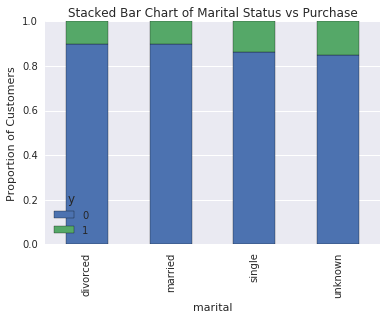

In [118]:
#4. Visualize the joint data

y_marital = pd.crosstab(dataset["marital"], dataset["y"])
ax = y_marital.div(y_marital.sum(1).astype(float), axis=0).plot.bar(stacked=True,
               title="Stacked Bar Chart of Marital Status vs Purchase")
ax.set_ylabel("Proportion of Customers")
plt.show()

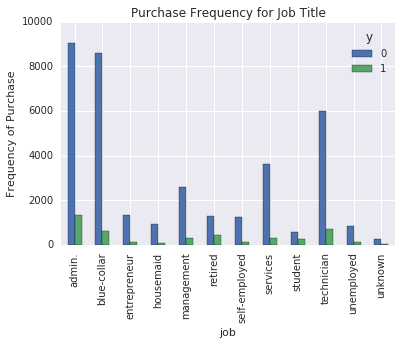

In [119]:
y_job = pd.crosstab(dataset["job"], dataset["y"])
ax = y_job.plot.bar(title="Purchase Frequency for Job Title")
ax.set_ylabel("Frequency of Purchase")
plt.show()

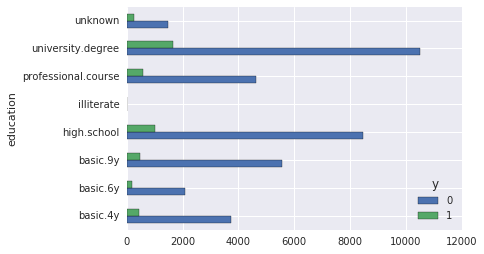

In [120]:
y_education = pd.crosstab(dataset["education"], dataset["y"])
y_education.plot.barh()
plt.show()

### Task-5:
Create dummy variables, that is variables with only two values, zero and one. Use the following
columns 'job', 'marital', 'default', 'housing', 'loan', 'poutcome'.

In [121]:
df = pd.DataFrame({'y':dataset['y'],'job':dataset['job'], 'marital': dataset['marital'], 'default': dataset['default'], 'housing': dataset['housing'], 'loan': dataset['loan'], 'poutcome':dataset['poutcome']})
dummy_vars = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'],prefix=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
print list(dummy_vars.keys())

['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


### Task-6:
Drop the unknown columns [12, 16, 18, 21, 24].

In [122]:
dropping_cols = [12,16,18,21,24]
dummy_vars = dummy_vars.drop(dummy_vars.columns[dropping_cols], axis=1)
print list(dummy_vars.keys())

['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


### Task-7:
Check the independence between the independent variables by drawing the heat map of the
data

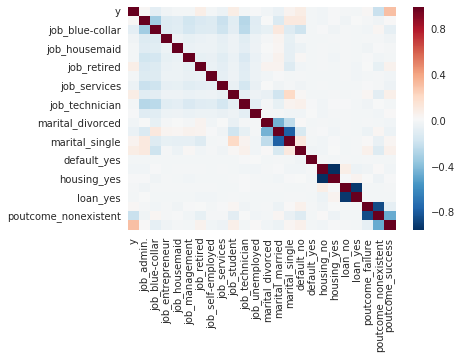

In [123]:
sns.heatmap(dummy_vars.corr(),cmap="RdBu_r")
plt.show()

### Task-8:
Split the data into training and test sets.
Hint: X = data.iloc[:,1:] and y = data.iloc[:,0] then use the sklearn function train_test_split()

In [124]:
array = dummy_vars.values
X = array[:,1:]
y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

### Task-9:
Fit logistic regression to the training set.

In [125]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Task-10:
Predicting the test set results and creating confusion matrix.

In [126]:
predictions = classifier.predict(X_test)
print "Confusion Matrix:\n", confusion_matrix(Y_test, predictions)

Confusion Matrix:
[[7243   78]
 [ 746  171]]


### Task-11:
Print the Accuracy of the classifier using the score() method of the classifier.

In [127]:
print "Accuracy:", accuracy_score(Y_test, predictions)

Accuracy: 0.899975722263


### Task-12:
Compute precision, recall, F-measure and support.

In [128]:
print "Classification Report:\n", classification_report(Y_test, predictions)

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      7321
          1       0.69      0.19      0.29       917

avg / total       0.88      0.90      0.87      8238

